## Datenvorbereitung , Prinzipielle Komponenten Analyse

<img width=400 height=400 class="imgright" src="Images/Cleaning.jpg"><br><br>
Wenn wir einen ML Algorithmus ausführen wollen, steht und fällt die Qualität des Ergebnisses mit der Qualität der Daten, die wir zum Training verwenden. Hierfür gibt es eine Menge Methoden, die uns bei dieser Aufgabe helfen, man nent dies Data Preprocessing. Ein wesentliches Prinzip ist dabei folgendes:

Wenn wir unsere Trainingsdaten vor der Anwendung unseres ML-Algorithmus transformieren, sie z.B. skalieren, normieren oder Ähnliches, dann müssen wir alle Daten, die in Zukunft mit diesem Algorithmus bearbeiten in derselben Weise behandeln. Dies gilt insbesondere für Testdaten oder neue Datensätze, die wir mit unserem System voraussagen möchten. Wir modifizieren die Daten in einer Art und Weise, daß die Lerneffektivität maximiert wird. Der Ablauf ist unten dargestellt.

<img width=800 height=800 src="Images/Datentransformation.png"><br><br>

Dies bedeutet, daß wir die exakt gleiche Transformation für alle Daten, die wir verwenden wollen, wählen müßen, un daß wir die Parameter für die Transformation aus den Trainingsdaten bestimmen. Alle von den Lernbibliotheken bereitgestellten Transformations-Methoden liefern uns daher ihre Parameter zurück, so daß wir sie auf auf neue zusätzliche Daten anwenden können. 

Bevor wir aber diese Methoden verwenden, müssen wir zunächst die generelle Struktur der Daten prüfen, ist die Aufbereitung sinvoll, enthalten die Daten von vornherein unnötige Features, die nicht zum ML beitragen können. Kann man Datensätze ausschliessen, weil sie nicht plausibel sind. Kann man schon bei einfachen Anschauen der Daten Samples ausschließen, weil sie nicht korrekt im Format sind, dupliziert sind, irrelevant sind, nicht im vergleichbaren Zeitrahmen oder mit vergleichbaren Methoden erhoben wurden...? Mit solchen Überlegungen kann man manchmal schon vorher den Datensatz säubern, ohne auf Bibliotheken zugreifen zu müssen. 

Dann folgen Verfahren, die wir z.B. in unserem California House Beispiel gezeigt haben. Zunächst müssen wir missing values, also fehlende oder unvollständige Daten behandeln. Im einfachsten Fall kann man einfach Datensätze mit missing values entfernen oder Features mit vielen fehlenden Einträgen nicht verwenden. Zu beachten beim Suchen nach missing values ist, in welcher Form sie im Originaldatensatz auftreten. Sind sie "None", "NaN", "NA","np.nan","?" oder einfach leer, oder haben sie ganz eigene Kennzeichnung? Für pandas dataframes ist vor allem die dropna Methode geeignet, mit ihr kan man sowohl ganze Samples als auch Features löschen, da sie als Parameter den axis -Wert für die Richtung des Löschvorgangs enthält und außerdem Filterkonditionen auswerten kann. 

df.dropna(axis=0) #Löscht eine Reihe, wennsie missing values enthält<br>
df.dropna(axis=1) #Löscht Features, wenn eine Sample in diesem Feature mindest einen missing value enthält.<br> 
df.dropna(how="all") #Löscht Reihe nur, wenn alle Faetures NaN sind.<br>
df.dropna(how="any") #Löscht Reihe, wenn midestens 1 Faeture NaN ist.<br>
df.dropna(tresh=4) #Löscht alle Reihen, die nicht mindestens 4 echte Werte haben<br>
df.dropna(subset=[Aufzählung der zu prüfenden Columns mit deren Namen als Strings, kommasepariert]) #Löscht Reihen nur, wenn in diesen columns NaN- Werte sind<br>
Mit pandas.options.mode.use_inf_as_na = True kann man inf und -inf als Nan definieren.<br>
pandas.isna() und pandas.notna() helfen missing values zu finden.
Einige dieser Methoden werden unten demonstriert.

In [8]:
import pandas as pd
import numpy as np
data= np.array([[1,2,3,4],[5,6,np.nan, 8],[10,11,12,None]])
datadf=pd.DataFrame(data,columns=["A","B","C","D"])
print("Original")
print(datadf)
datadf = datadf.fillna(value=np.nan) #None Python in NaN Pandas verwandeln
print("\nNone zu NaN")
print(datadf)
datadf.dropna(axis=0,inplace=True)
print("\nReihen löschen mit NaN")
print(datadf)
data= np.array([[1,2,3,4],[5,6,np.nan, 8],[10,11,12,None]])
datadf=pd.DataFrame(data,columns=["A","B","C","D"])
datadf.dropna(axis=1,inplace=True)
print("\nSpalten löschen mit NaN")
print(datadf)
data= np.array([[1,2,3,4],[5,6,np.nan, 8],[10,11,12,None]])
datadf=pd.DataFrame(data,columns=["A","B","C","D"])


Original
    A   B    C     D
0   1   2    3     4
1   5   6  NaN     8
2  10  11   12  None

None zu NaN
    A   B     C    D
0   1   2   3.0  4.0
1   5   6   NaN  8.0
2  10  11  12.0  NaN

Reihen löschen mit NaN
   A  B    C    D
0  1  2  3.0  4.0

Spalten löschen mit NaN
    A   B
0   1   2
1   5   6
2  10  11


Bei anderen missing value Bezeichnungen kann man so in NaN umwandeln. isna() erlaubt umschreiben.

In [9]:
data= np.array([[1,2,3,4],[5,6,"?", 8],[10,11,12,None]])
datadf=pd.DataFrame(data,columns=["A","B","C","D"])
print(datadf)
datadf.fillna(value=np.nan,inplace=True)
datadf.replace(to_replace="?", value=np.nan, inplace=True)
print(datadf)
print(datadf.isna())
datadf[datadf.isna()]="bla"
datadf

    A   B   C     D
0   1   2   3     4
1   5   6   ?     8
2  10  11  12  None
    A   B     C    D
0   1   2   3.0  4.0
1   5   6   NaN  8.0
2  10  11  12.0  NaN
       A      B      C      D
0  False  False  False  False
1  False  False   True  False
2  False  False  False   True


,A,B,C,D
0,1,2,3,4
1,5,6,bla,8
2,10,11,12,bla


Alle diese Verfahren haben aber den Nachteil, daß der Datensatz sehr schnell sehr klein werden kann, wenn wir konsequuent alles löschen, was missing values enthält. Eine andere Möglichkeit wäre, einen Imputer zu verwenden. sklearn hat eine solche Teilbibliothek mit ```from sklearn.impute import SimpleImputer``` können wir diesen auf unsere Daten anwenden.
Wir können so missing values nach bestimmten Methoden in computierbare Werte umwandeln. Zu Beispiel können wir den Mittelwert einer Spalte einsetzen. Andere Möglichkeiten sind: “median”,"constant" für einen konstanten Wert z.B. für strings (dann muß aber mit fill_value= ... eingegeben werden, was der Ersatzwert sein soll)  oder “most_frequent”.
Natürlich muß man sich gut überlegen, ob ein solches ersetzen von Daten mehr Sinn macht, als konsequent missin values zu löschen.

In [10]:
from sklearn.impute import SimpleImputer
data= np.array([[1,2,3,4],[5,6,np.nan, 8],[10,11,12,np.nan]])
print(data)
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
imp=imp.fit(data)
imputed=imp.transform(data)
imputed

[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Es geht auch direkt in Pandas. Hier können auch .max, .min, .median, .sum, .count oder andere Methoden verwendet werden. 

In [11]:
from sklearn.impute import SimpleImputer
data= np.array([[1,2,3,4],[5,6,None, 8],[10,11,12,None]])
datadf=pd.DataFrame(data,columns=["A","B","C","D"])
datadf.fillna(value=np.nan,inplace=True)
print(datadf)
datadf.fillna(datadf.mean(), inplace=True)

datadf

    A   B     C    D
0   1   2   3.0  4.0
1   5   6   NaN  8.0
2  10  11  12.0  NaN


,A,B,C,D
0,1,2,3.0,4.0
1,5,6,7.5,8.0
2,10,11,12.0,6.0


Bei numerischen Daten sind die ML Algorithmen oft empfindlich auf den absoluten Größenbereich der einzelnen Features. Als Beispiel können wir uns vorstellen, die Quadratmeter eines Hauses als Feature zu haben und die Anzahl der Schlafzimmer in einem Kategorisierer, der den Verkaufspreis von Häusern vorhersagen soll. Der numerische Bereich dieser Features ist völlig unterschiedlich. In einigen Algorithmen kann sich dann das Feature mit dem größten Werten gegenüber den anderen so durchsetzen, dasß diese fast keinen Rolle mehr spielen. Man muß vorher die Features auf einen gemeinsamen Wertebereich bringen. Ein anderes Beispiel wäre ein Clustering-Verfahren, bei dem unterschiedliche Maßstäbe für die Features zu völlig verzerrten Distanzmaßen führen würde. Hierzu bietet sklearn einige Möglichkeiten der Tranbsformierung unserer Features an.

In [12]:
from sklearn import preprocessing
import numpy as np
data=np.array([
    [3.4,2.1,6.3],
    [-2.3,4.5,-6.1],
    [4.0,1.9,2.1],
    [-10.2,8.8,4.0]
    
])
print(f"Ausgangsdaten:\n{data}\n")

print("_"*125)
#Schwellenwertverfahren zum Verwandeln der Daten in Binärdaten mit Schwellenwert
bin_data=preprocessing.Binarizer(threshold=3).transform(data)
print(f"Binarisiert mit Schwelle 3:\n{bin_data}\n")
print(f"Werte <=Schwelle ->0      >Schwelle ->1")
print("_"*125)
#Entfernung des Mittelwertes zur Zentrierung auf 0
print(f"Mittelwertnullung")
print(f"Mittelwert und Standardabweichung\n aller Daten vor Mittelwertnullung: {data.mean():5.2f}  {data.std():5.2f}")
data_minus_mean=preprocessing.scale(data)
print(f"\nMittelwert und Standardabweichung\n aller Daten nach Mittelwertnullung: {data_minus_mean.mean():5.2f}  {data_minus_mean.std():5.2f}")
print("\n",data_minus_mean,"\n")
print(f"alle Werte so verändern, daß Mittelwert 0    Standardabweichung 1")
print("_"*125)
#Skalierung, jede Spalte!!! und damit jede Feature
data_scaler=preprocessing.MinMaxScaler(feature_range=(0,5)) #erzeuge Skalierer
data_scaled=data_scaler.fit_transform(data)
print(f" MinMax Skalieren")
print(f"auf Bereich zwischen 0 und 5 skalierte Spalten:\n {np.round(data_scaled,2)}\n")
print(f"alle Spalten so verändern, daß kleinster Wert 0 und größter Wert 1 (wählbar) \n andere Werte proportional dazwischen")
print("_"*125)
#Normalisierung auf 1 kleinste absolute Abweichungsmethode Summe der Absolutwerte der Spalten ist 1
data_n1=preprocessing.normalize(data,norm="l1")
print("Normalisieren")
print(f"Spaltenabsolutwerte normalisiert auf 1:\n {data_n1}\n")
print(f"alle Spalten so verändern, daß Summe der Werte 1 ergibt.")
print("_"*125)
#Normalisierung auf 1 mit Quadratensummen , diese sind in jeder Spalte 1
data_n2=preprocessing.normalize(data,norm="l2")
print(f"Spaltenquadrat Summe normalisiert auf 1:\n {data_n2}\n")
print(f"alle Spalten so verändern, daß Quadratsumme der Werte 1 ergibt.")
#print(np.sum(data_n2[:1]**2)) #test ob Spaltenquadratsumme 0

Ausgangsdaten:
[[  3.4   2.1   6.3]
 [ -2.3   4.5  -6.1]
 [  4.    1.9   2.1]
 [-10.2   8.8   4. ]]

_____________________________________________________________________________________________________________________________
Binarisiert mit Schwelle 3:
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]

Werte <=Schwelle ->0      >Schwelle ->1
_____________________________________________________________________________________________________________________________
Mittelwertnullung
Mittelwert und Standardabweichung
 aller Daten vor Mittelwertnullung:  1.54   5.09

Mittelwert und Standardabweichung
 aller Daten nach Mittelwertnullung:  0.00   1.00

 [[ 0.81882978 -0.80069779  1.01089757]
 [-0.17952953  0.06297623 -1.64203996]
 [ 0.92392024 -0.87267063  0.11232195]
 [-1.5632205   1.61039219  0.51882044]] 

alle Werte so verändern, daß Mittelwert 0    Standardabweichung 1
____________________________________________________________________________________________________________________

Bei kategorischen Daten braucht man oft einen Encoder, der die Kategorienbezeichnungen der Features oder Label in Zahlen verwandelt. Manche Algorithmen arbeiten nur mit numerischen Werten. Natürlich haben die numerischen Werte keine ordinale Bedeutung, sie sind nicht geordnet. Ein LabelEncoder braucht 1dim Arrays (die Label). Er kodiert hin und zurück.

In [13]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import numpy as np
le = LabelEncoder()
a=np.array(["paris", "paris", "tokyo", "amsterdam"])
le.fit(a)
a=le.transform(a)
print(a)
print(le.inverse_transform(a))
#['tokyo', 'tokyo', 'paris']

[1 1 2 0]
['paris' 'paris' 'tokyo' 'amsterdam']


Auch one-hot Encoding ist kein Problem.

Ein ordinaler Encoder kann kategorische Features in Zahlen verwandeln.

In [14]:
import numpy as np
a=np.array([["red","cat"],["blue","bird"],["black","dog"]])
print(a)
ord= OrdinalEncoder()
ord.fit(a)
a=ord.transform(a)
print(a)


[['red' 'cat']
 ['blue' 'bird']
 ['black' 'dog']]
[[2. 1.]
 [1. 0.]
 [0. 2.]]


In [15]:
le = OneHotEncoder()
a=np.array([["red","cat"],["blue","bird"],["black","dog"]])
le.fit(a)
a=le.transform([["blue","dog"]]).toarray() #damit es lesbar ist
print(a)
print(le.inverse_transform(a))
#['tokyo', 'tokyo', 'paris']

[[0. 1. 0. 0. 0. 1.]]
[['blue' 'dog']]


Es ist wichtig, sich zu erinnern, daß man natürlich nur die Trainingsdaten fittet. Die Testdaten oder neue Datensätze im Verlauf des Arbeitens mit dem ML-Algorithmus werden nur mit demselben Encoder transformiert!
z.B. so:

In [16]:
new_sample=np.array([["red","bird"]])
b=le.transform([["red","bird"]]).toarray()
print(b)

[[0. 0. 1. 1. 0. 0.]]


Wenn wir unsere Daten vorbereitet haben mit Berücksichtigung der Missing Values, Normiertung, Skalierung, Imputing, Encoding... müssen wir noch überlegen, ob die Anzahl der Features in einem guten Verhältnis zur Größe der Trainingsdaten steht. Viele Features, wenig Samples machen jeden ML_Algorithmus inefficient. Man muß immer ins Auge fassen, ob alle Features gleichwertig sind, oder ob sich die Anzahl der Features ohne wesentlichen Informationsverlust veringern läßt. Ein Beispiel für den Iris-Datensatz.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
data = datasets.load_iris()
X,y=np.array(data.data),np.array(data.target)

X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y, test_size=.33,  random_state=42,\
                                                                   shuffle=True )
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)                                                                
logreg = LogisticRegression(C=1e4,max_iter=10000)
logreg.fit(X_train, y_train)
pred=logreg.predict(X_test)
print(pred,y_test)
print(f"Accuracy = : {logreg.score(X_test,y_test)}")


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Accuracy = : 0.98


Wir erhalten also bei Berücksichtigung aller Features eine Accuracy von .98. Wenn wir uns den Datensatz ansehen, finden wir, daß sich jeweils 2 Features auf die Kelchblätter und 2 Features auf die Blütenblätter beziehen. Dabei ist immer ein Feature die Länge dieses Elements, das andere die Breite. Was nun, wenn wir die Breite und Länge jeweils multiplizieren als ungefähres Maß der Fläche? Verlieren wir durch diese Reduktion der Dimensionen des Featureraumes von 4 auf 2 viel Accuracy? Versuchen wir es. Unten eine Grafik mit unseren kombinierten Werten für Kelchblattlänge*-breite und Blütenblattlänge*-breite.

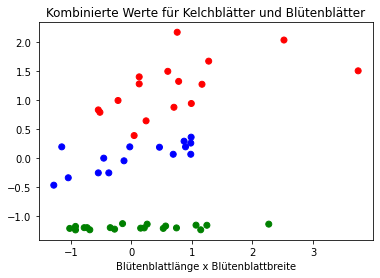

Accuracy = : 0.98


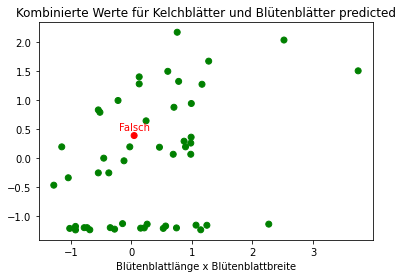

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
data = datasets.load_iris()
X,y=np.array(data.data),np.array(data.target)

Xneu=np.column_stack([X[:,0]*X[:,1],X[:,2]*X[:,3]])

colormap=np.array(["green","blue","red"])

X_train, X_test, y_train, y_test=model_selection.train_test_split(Xneu,y, test_size=.33,  random_state=42,\
                                                                   shuffle=True )
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
plt.title("Kombinierte Werte für Kelchblätter und Blütenblätter")
plt.xlabel("Kelchblattlänge x Kelchblattbreite")
plt.xlabel("Blütenblattlänge x Blütenblattbreite")
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[y_test])
plt.show()
logreg = LogisticRegression(C=1e4,max_iter=10000)
logreg.fit(X_train, y_train)
pred=logreg.predict(X_test)

plt.title("Kombinierte Werte für Kelchblätter und Blütenblätter predicted")
plt.xlabel("Kelchblattlänge x Kelchblattbreite")
plt.xlabel("Blütenblattlänge x Blütenblattbreite")
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[pred-y_test])
plt.annotate("Falsch", [-.2,.47],c="red")
print(f"Accuracy = : {logreg.score(X_test,y_test)}")

Wir ereichen die gleiche Accuracy! Natürlich wird der Algorithmus mit weniger Features schneller (was natürlich in unserem "Toy"-Beispiel keine große Rolle spielt, bei Big Data aber entscheidend sein kann), außerdem können wir oft nur durch Reduktion der Dimensionen den Datensatz visualisieren. Wenn wir viele Dimensionen haben, entsteht in unserem Featureraum viel "leerer Platz". Wir erleben dann den "Fluch der Dimensionen". Das macht es dem ML Algorithmus nicht leichter zu vernünftigen Ergebnissen zu kommen.<br><br><img width=800 height=800 src="Images/Fluch der Dimensionalität.png"><br><br>In unserem Fall bot sich die Art der Zusammenfassung von jeweils 2 Features durch die Struktur des Datensatzes geradezu an. Was aber, wenn wir viele Features haben und nicht über den Zusammenhang der Features untereinander wissen, trotzdem aber eine Reduktion der Dimensionen des Featureraumes vornehmen wollen oder müssen? Hierfür brauchen wir eine Primäre Komponenten Analyse (PCA Primary Componenet Analysis), die uns mit diesen Informationen versorgt bzw. automatisch in bestmöglicher Form den multidimensionalen Featureraum auf beliebige Dimensionen reduziert.

Was passiert dabei? Nehmen wir an, wir haben einen 2D Datensatz, den wir auf 1D reduzieren wollen.

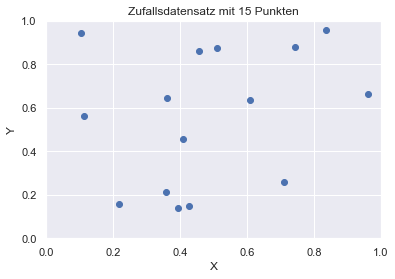

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(44)
import seaborn as sns
sns.set()
data=np.column_stack([np.random.random(15),np.random.random(15)])
plt.title("Zufallsdatensatz mit 15 Punkten")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(data[:,0],data[:,1])

Eine Möglichkeit wäre natürlich, nur die X- oder die Y-Komponenet zu verwenden. Hier ein Beispiel für X ,die roten Punkte wären die neuen Datenpunkte, die jetzt nur noch einen X-Wert hätten.

[0.83484215 0.95747207]


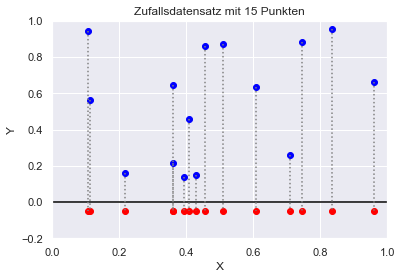

In [20]:
plt.title("Zufallsdatensatz mit 15 Punkten")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([0,1])
plt.ylim([-.2,1])
plt.scatter(data[:,0],data[:,1],color="blue")
plt.scatter(data[:,0],np.zeros(15)-.05,color="red")
print(data[0])
plt.plot((0,1),(0,0),color="black")
for _ in range(len(data)):
    plt.plot((data[_,0],data[_,0]),(data[_,1],-0.05),color="grey",linestyle=":")

Wir haben zwar die Dimension auf 1 verringert, aber alle Y-Information ist verloren. Der erste und zweite Wert von links hat fast denselben X-Wert, obwohl sie in völlig unterschiedlichen Regionen liegen, wenn man auch die y_Werte berücksichtigt. Gibt es bessere Möglichkeiten? Und wie messen wir die Qualität unserer Dimensionsreduktion? Ein hierfür benötigtes Maß ist die Varianz:<br>  $$var(x)= \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}$$<br> Sie entspricht der Summe der Abstandsquadrate der Einzelwerten zum Mittelwert geteilt durch die Anzahl der Werte. Es macht natürlich nur Sinn die Streuung der Werte zu vergleichen, wenn man vorher Alles gleich skaliert hat. Wenn wir uns hier ein Beispiel machen mit unterschiedlichen Varianzen für x und y wird klar, welche Achse wichtiger ist. 

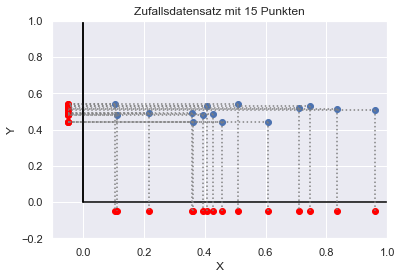

In [21]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(44)
import seaborn as sns
sns.set()
data=np.column_stack([np.random.random(15),np.random.normal(.5,0.05,15)])
plt.title("Zufallsdatensatz mit 15 Punkten")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([-.1,1])
plt.ylim([-.2,1])
plt.scatter(data[:,0],data[:,1])
plt.scatter(data[:,0],np.zeros(15)-.05,color="red")
plt.plot((0,1),(0,0),color="black")
for _ in range(len(data)):
    plt.plot((data[_,0],data[_,0]),(data[_,1],-0.05),color="grey",linestyle=":")
plt.plot((0,0),(0,1),color="black")
for _ in range(len(data)):
    plt.plot((data[_,0],-0.05),(data[_,1],data[_,1]),color="grey",linestyle=":")
plt.plot((0,0),(0,1),color="black")
plt.scatter(np.zeros(15)-.05,data[:,1],color="red")


Hier ist klar, daß der X-Wert der Punkte wesentlich mehr Information enthält, um die Punkte zu separieren. Bei der PCA geht es darum, so die Diemnsionen zu reduzieren, daß das Ergebnis eine möglichst große Varianz ergibt. In unserem Fall wäre die Varianz für die Reduktion auf <br>die X-Achse: 0.0590 <br>die Y-Achse: 0.00113.<br> Es ist also klar zu sehen, welches Verfahren besser wäre. Aber es geht besser:


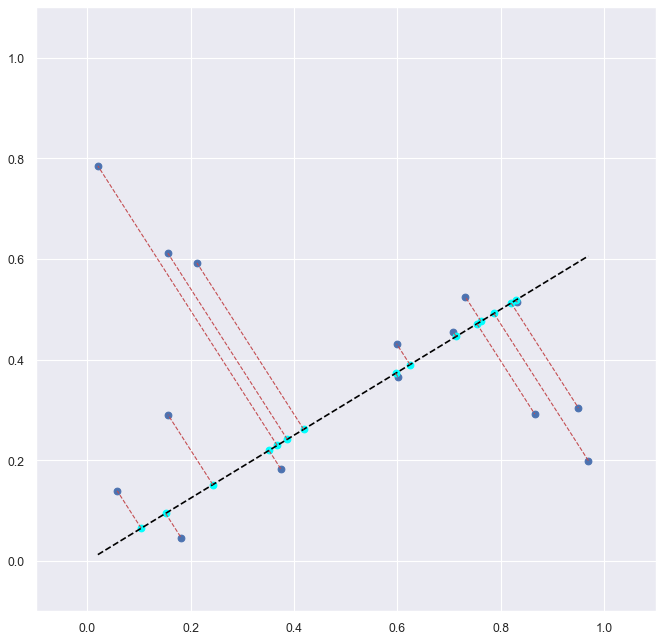

In [22]:
#vec = np.array([x,y])
#vec = np.array([0.6778734,0.73517866])
from matplotlib.pyplot import figure
figure(figsize = (10, 10), dpi = 80)
vec= np.array([0.8,.5])
np.random.seed(42)
data=np.column_stack([np.random.random(15),np.random.random(15)])
plt.xlim([-.1,1.1])
plt.ylim([-.1,1.1])
plt.scatter(data[:,0],data[:,1])
minimum,maximum=min(data[:,0]),max(data[:,0])
plt.plot(np.linspace(minimum,maximum),(vec[1]/vec[0])*np.linspace(minimum,maximum),linewidth=1.5,color="black",linestyle="--")



b_on_vec_list = [[],[]]
for i in range(len(data)):
    a = vec
    b = np.array([data[i,0],data[i,1]])    
    b_on_a = (np.dot(a,b)/np.dot(a,a))*a
    b_on_vec_list[0].append(b_on_a[0])
    b_on_vec_list[1].append(b_on_a[1])
    plt.scatter(b_on_a[0],b_on_a[1],color='cyan')    
    plt.plot([b_on_a[0],b[0]],[b_on_a[1],b[1]],"r--",linewidth=1)

plt.show()


Wir sehen, daß die Punkte jetzt auf eine Strecke projeziert wurden mit einer bestimmten Steigung. Ist die Varianz besser als nur auf der X-Achse? Wir können nicht einfach die Varianz auf der der Punkte auf der Strecke berechnen, erst müssen wir sie auf denselben Maßstab wie die Achsen bringen mit Länge 1. 

[0.83484215 0.1047961  0.74464048 0.36050084 0.35931084 0.60923838
 0.39377955 0.40907261 0.50990241 0.71014799 0.96052623 0.45662111
 0.42765152 0.1134637  0.21789887] [1.2008198  0.45947668 1.05009991 0.47762929 0.13037069 0.71870399
 0.10509655 0.37603587 0.80899296 0.51690824 1.0924071  0.74676058
 0.14672997 0.16382367 0.        ]
Varianz bei Projektion auf X: 0.05905526040095446
Varianz bei Projektion auf Y: 0.14205521300718008


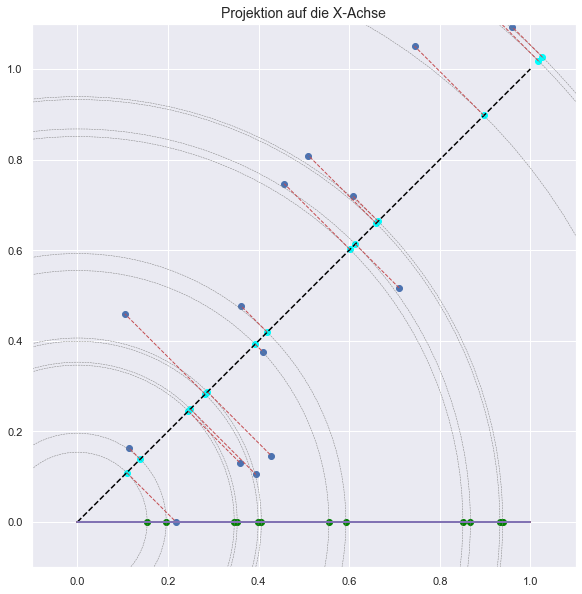

Varianz bei Projektion auf Strecke: 0.17337117157886975


In [23]:
from matplotlib.pyplot import figure
from matplotlib import style
from ipywidgets import interact,interactive,fixed,interact_manual
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot()
ax0.set_aspect('equal')
ax0.set_title('Projektion auf die X-Achse',fontsize=14)
#ax0.set_xlabel('PC x value',fontsize=10)
#ax0.set_ylabel('PC y value',fontsize=10)
vec= np.array([0.5,0.5])
np.random.seed(44)
x=np.random.random(15)
y=x+np.random.random(15)*.8-.4
y[y<0]=0
data=np.column_stack([x,y])
#data=np.column_stack([np.random.random(15),np.random.random(15)])
plt.xlim([-.1,1.1])
plt.ylim([-.1,1.1])
plt.scatter(data[:,0],data[:,1])
plt.plot(np.linspace(0,1),(vec[1]/vec[0])*np.linspace(0,1),linewidth=1.5,color="black",linestyle="--")

print(data[:,0],data[:,1])

b_on_vec_list = [[],[]]
for i in range(len(data)):
    a = vec
    b = np.array([data[i,0],data[i,1]])
    #print(b)

    b_on_a = (np.dot(a,b)/np.dot(a,a))*a
    b_on_vec_list[0].append(b_on_a[0])
    b_on_vec_list[1].append(b_on_a[1])
    plt.scatter(b_on_a[0],b_on_a[1],color='cyan')
    #print(b_on_a[0])
    plt.plot([b_on_a[0],b[0]],[b_on_a[1],b[1]],"r--",linewidth=1)


print(f"Varianz bei Projektion auf X: {np.var(data[:,0])}")
print(f"Varianz bei Projektion auf Y: {np.var(data[:,1])}")
dist=np.zeros(len(data))

for i in range(len(data)):
    dist[i]=np.sqrt(b_on_vec_list[0][i]**2+b_on_vec_list[1][i]**2)

plt.scatter(dist,np.zeros(len(data)),color="green")
for i in range(len(data)):
        ax0.add_artist(plt.Circle((0,0),dist[i],linewidth=0.5,linestyle='dashed',color='grey',fill=False))
        plt.plot((0,1),(0,0),linewidth=2)
plt.show()
print(f"Varianz bei Projektion auf Strecke: {np.var(dist)}")

Machen wir dies nun für viele Strecken mit unterschiedlicher Steigung, wo haben wir die größte Varianz?

In [24]:
steigung_dict=dict()
for j in np.arange(0,2,.01):
    b_on_vec_list = [[],[]]
    for i in range(len(data)):
        a = np.array([.5,j])
        b = np.array([data[i,0],data[i,1]])
        #print(b)

        b_on_a = (np.dot(a,b)/np.dot(a,a))*a
        b_on_vec_list[0].append(b_on_a[0])
        b_on_vec_list[1].append(b_on_a[1])
    dist=np.zeros(len(data))
    
    for i in range(len(data)):
        dist[i]=np.sqrt(b_on_vec_list[0][i]**2+b_on_vec_list[1][i]**2)
    
    var=np.var(dist)
    #print(f"Steigung {j} Varianz: {var}")
    steigung_dict[j]=var
#print(steigung_dict)
maximum=max(steigung_dict.values())
for key,val in steigung_dict.items():
    if steigung_dict[key]==maximum:
        print(key,val)
        break
    

0.86 0.18436697113245665


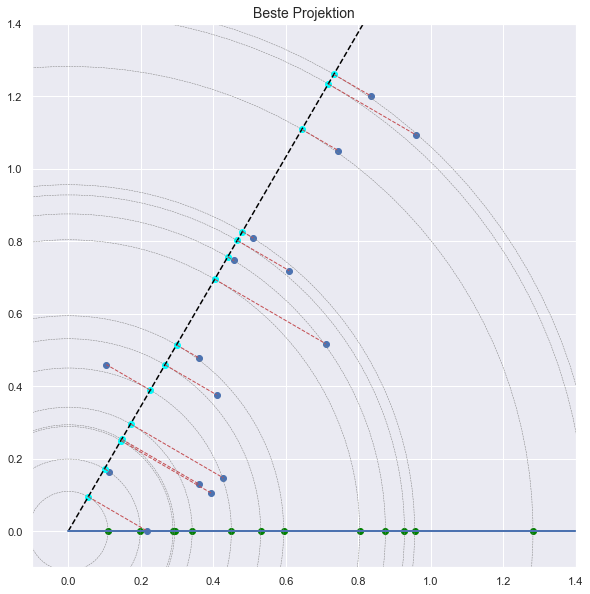

Varianz bei Projektion auf X: 0.05905526040095446
Varianz bei Projektion auf Y: 0.14205521300718008
Varianz bei Projektion auf Strecke: 0.18436697113245665


In [25]:
from matplotlib.pyplot import figure
from matplotlib import style
from ipywidgets import interact,interactive,fixed,interact_manual
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot()
ax0.set_aspect('equal')
ax0.set_title('Beste Projektion',fontsize=14)
#ax0.set_xlabel('PC x value',fontsize=10)
#ax0.set_ylabel('PC y value',fontsize=10)


vec= np.array([.5,.86])
np.random.seed(44)
x=np.random.random(15)
y=x+np.random.random(15)*.8-.4
y[y<0]=0
data=np.column_stack([x,y])
#data=np.column_stack([np.random.random(15),np.random.random(15)])
plt.xlim([-.1,1.4])
plt.ylim([-.1,1.4])
plt.scatter(data[:,0],data[:,1])
plt.plot(np.linspace(0,1.2),(vec[1]/vec[0])*np.linspace(0,1.2),linewidth=1.5,color="black",linestyle="--")

#print(data[:,0],data[:,1])

b_on_vec_list = [[],[]]
for i in range(len(data)):
    a = vec
    b = np.array([data[i,0],data[i,1]])
    #print(b)

    b_on_a = (np.dot(a,b)/np.dot(a,a))*a
    b_on_vec_list[0].append(b_on_a[0])
    b_on_vec_list[1].append(b_on_a[1])
    plt.scatter(b_on_a[0],b_on_a[1],color='cyan')
    #print(b_on_a[0])
    plt.plot([b_on_a[0],b[0]],[b_on_a[1],b[1]],"r--",linewidth=1)



dist=np.zeros(len(data))

for i in range(len(data)):
    dist[i]=np.sqrt(b_on_vec_list[0][i]**2+b_on_vec_list[1][i]**2)

plt.scatter(dist,np.zeros(len(data)),color="green")
for i in range(len(data)):
        ax0.add_artist(plt.Circle((0,0),dist[i],linewidth=0.5,linestyle='dashed',color='grey',fill=False))
plt.plot((0,1.4),(0,0),linewidth=2)
plt.show()
print(f"Varianz bei Projektion auf X: {np.var(data[:,0])}")
print(f"Varianz bei Projektion auf Y: {np.var(data[:,1])}")
print(f"Varianz bei Projektion auf Strecke: {np.var(dist)}")

Wir haben jetzt die Linie mit der besten Varianz gefunden und würden unsere eindimensionalen Punkte jetzt auf diese Werte setzen. Diese wäre für unseren Fall die erste prinzipelle Komponente, die in entsprechenden Bibliotheken für uns ausgewählt wird. Dieses geht natürlich aus höherdimensional, dann bekommt man Flächen oder Hyperflächen, die ein Zusammenführen der Daten möglichst effektiv zulassen, so daß die verbleibenden Features die höchstmögliche Varianz besitzen. Wir zeigen jetzt ein Beispiel mit der sklearn Bibliothek. Wir nehmen hierzu die Wine Datei, die 178 Weine bezüglich 13 verschiedener Features in 3 Gruppen klassifiziert. Die Features sind:<br><br>
'Alcohol'<br> 'Malic acid'<br> 'Ash'<br>
                   'Alcalinity of ash'<br> 'Magnesium'<br> 'Total phenols'<br>
                   'Flavanoids'<br> 'Nonflavanoid phenols'<br> 'Proanthocyanins'<br>
                   'Color intensity'<br> 'Hue'<br> 'OD280/OD315 of diluted wines'<br>
                   'Proline'<br>
Zunächst klassifizieren wir mit LogisticRegression mit allen 13 Features. 2 Beispiele für das Ergebnis der Klassifikation jeweils  zweier Features sind unten gezeigt. Die Accuracy beträgt 1.0. <br>
Dann führen wir eine PCA durch auf 2 Dimensionen und zeigen deren Ergebnis. Die Accuracy sinkt nur unbedeutend auf 0.966.
Dies ist in diesem Fall nicht nötig, das Datenset ist klein, der Algorithmus schnell. Bei Big Data kann die PCA aber entscheidend sein. Wir zeigen den Einfluss der Zahl der verbleibenden Dimensionen auf die Accuracy in einem Diagramm.

In [26]:
def show_regions(X, y, method, res=.02):

    
    m = np.array(['o', 's', '+', '^', 'v','x'])
    c = np.array(['red', 'blue', 'lightgreen', 'yellow', 'cyan','violet'])
    
    X1min,X2min,X1max,X2max=X[:, 0].min()-.5,X[:, 1].min()-.5,X[:, 0].max()+.5,X[:, 1].max()+.5
    
    xmesh1, xmesh2 = np.meshgrid(np.arange(X1min,X1max,res),
                         np.arange(X2min,X2max,res))
    
    Z = method.predict(np.array([xmesh1.ravel(), xmesh2.ravel()]).T)
    Z=Z.reshape(xmesh1.shape)
    print(Z.shape)
    
    #Z = Z.reshape(xmesh1.shape)
    plt.contourf((xmesh1, xmesh2), Z, alpha=0.4, colors=c[y])
    plt.xlim(X1min,X1max)
    plt.ylim(X2min,X2max)

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[:,0][y == cl], X[:,1][y == cl],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)



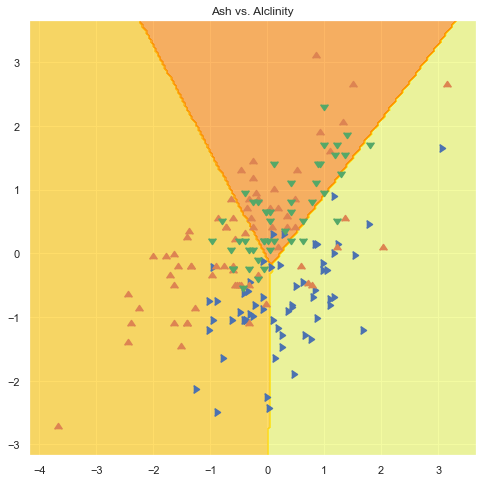

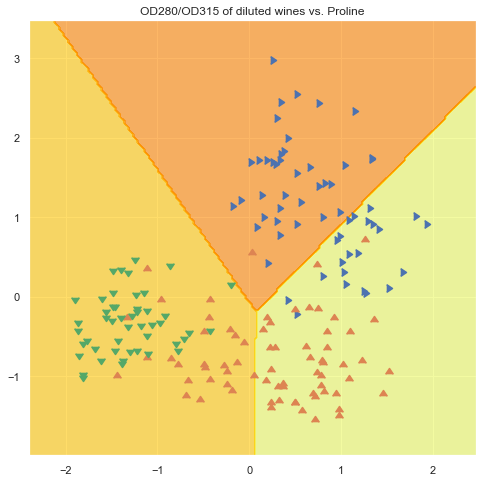

Accuracy with 12 Features: 1.0


In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import figure

def show_regions(X, y, classifier, number=200):
    markers =np.arange(5,11)
    colors = np.array(['red', 'cyan','violet','blue', 'lightgreen', 'yellow'])
    X1min,X2min,X1max,X2max=X[:, 0].min()-.5,X[:, 1].min()-.5,X[:, 0].max()+.5,X[:, 1].max()+.5
    xkoord, ykoord = np.meshgrid(np.linspace(X1min, X1max, number),np.linspace(X2min, X2max, number))
    Z = classifier.predict(np.array([xkoord.ravel(), ykoord.ravel()]).T)
    Z = Z.reshape(xkoord.shape)
    plt.contourf(xkoord, ykoord, Z, alpha=0.6, cmap="Wistia")
    plt.xlim(X1min,X1max)
    plt.ylim(X2min,X2max)
    for i, c in enumerate(np.unique(y)):
        plt.scatter(X[:,0][y==c],X[:,1][y==c],cmap=colors[c], marker=markers[i],s=60)
    plt.show()



df_wine = pd.read_csv('Data/wine.data', header=0)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


X=np.array(df_wine.iloc[:,1:])
enc=StandardScaler()
X=enc.fit_transform(X)
y = np.array(df_wine['Class label']).astype(int)
clf = LogisticRegression(random_state=0).fit(X[:,:2], y)
plt.figure(figsize=(8,8))
plt.title("Ash vs. Alclinity")
show_regions(X[:,2:4],y,clf)
plt.figure(figsize=(8,8))
plt.title("OD280/OD315 of diluted wines vs. Proline")
show_regions(X[:,11:13],y,clf)

plt.show()
clf1 = LogisticRegression(random_state=0).fit(X, y)
print(f"Accuracy with 12 Features: {clf1.score(X, y)}")

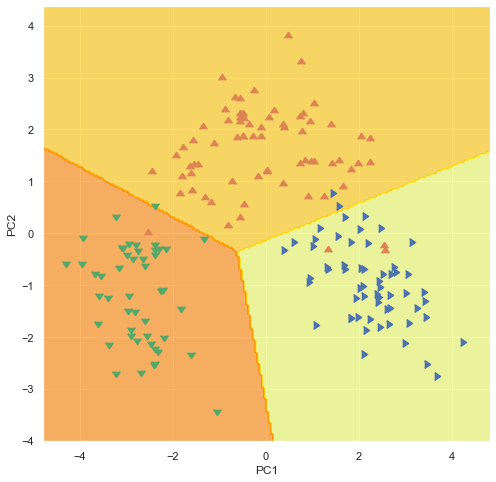

<Figure size 576x576 with 0 Axes>

Accuracy with Reduktion auf 2 Dimensionen: 0.9662921348314607


In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import figure
from sklearn.decomposition import PCA

def show_regions(X, y, classifier, number=200):
    markers =np.arange(5,11)
    colors = np.array(['red', 'cyan','violet','blue', 'lightgreen', 'yellow'])
    X1min,X2min,X1max,X2max=X[:, 0].min()-.5,X[:, 1].min()-.5,X[:, 0].max()+.5,X[:, 1].max()+.5
    xkoord, ykoord = np.meshgrid(np.linspace(X1min, X1max, number),np.linspace(X2min, X2max, number))
    Z = classifier.predict(np.array([xkoord.ravel(), ykoord.ravel()]).T)
    Z = Z.reshape(xkoord.shape)
    plt.contourf(xkoord, ykoord, Z, alpha=0.6, cmap="Wistia")
    plt.xlim(X1min,X1max)
    plt.ylim(X2min,X2max)
    for i, c in enumerate(np.unique(y)):
        plt.scatter(X[:,0][y==c],X[:,1][y==c],cmap=colors[c], marker=markers[i],s=60)               



df_wine = pd.read_csv('Data/wine.data', header=0)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


X=np.array(df_wine.iloc[:,1:])
enc=StandardScaler()
X=enc.fit_transform(X)
y = np.array(df_wine['Class label']).astype(int)

pca = PCA(n_components=2)
lr = LogisticRegression()
X = pca.fit_transform(X)
#X_test_pca = pca.transform(X_test_std)
lr.fit(X, y)
plt.figure(figsize=(8,8))
show_regions(X, y, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.figure(figsize=(8,8))
plt.show()
print(f"Accuracy with Reduktion auf 2 Dimensionen: {lr.score(X, y)}")


Accuracy with Reduktion auf 13 Dimensionen: 1.0
Accuracy with Reduktion auf 12 Dimensionen: 1.0
Accuracy with Reduktion auf 11 Dimensionen: 1.0
Accuracy with Reduktion auf 10 Dimensionen: 1.0
Accuracy with Reduktion auf 9 Dimensionen: 1.0
Accuracy with Reduktion auf 8 Dimensionen: 1.0
Accuracy with Reduktion auf 7 Dimensionen: 1.0
Accuracy with Reduktion auf 6 Dimensionen: 0.9943820224719101
Accuracy with Reduktion auf 5 Dimensionen: 0.9943820224719101
Accuracy with Reduktion auf 4 Dimensionen: 0.9719101123595506
Accuracy with Reduktion auf 3 Dimensionen: 0.9719101123595506
Accuracy with Reduktion auf 2 Dimensionen: 0.9662921348314607
Accuracy with Reduktion auf 1 Dimensionen: 0.848314606741573


Text(0, 0.5, 'Accuracy')

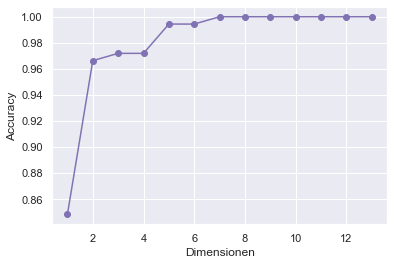

In [30]:
df_wine = pd.read_csv('Data/wine.data', header=0)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


X=np.array(df_wine.iloc[:,1:])
enc=StandardScaler()
X=enc.fit_transform(X)
y = np.array(df_wine['Class label']).astype(int)
dims,res=[],[]
for i in range(13,0,-1):
    pca = PCA(n_components=i)
    lr = LogisticRegression()
    X = pca.fit_transform(X)    
    lr.fit(X, y)
    dims.append(i)
    res.append(lr.score(X, y))
    print(f"Accuracy with Reduktion auf {i} Dimensionen: {lr.score(X, y)}")
plt.plot(dims,res,'om-')
plt.xlabel("Dimensionen")
plt.ylabel("Accuracy")